# Netflix Movies & TV Shows Analysis

This notebook analyzes the Netflix dataset using Python and data visualization techniques.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

## Loading the Dataset

We load the Netflix dataset and inspect its structure.

In [6]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data Cleaning

Missing values are handled and date columns are processed.

In [7]:
df['director'] = df['director'].fillna('Unknown Director')
df['cast'] = df['cast'].fillna('Unknown Cast')
df['country'] = df['country'].fillna('Unknown Country')

df = df.dropna(subset=['rating'])

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df = df.dropna(subset=['date_added'])

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8705 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8705 non-null   object        
 1   type          8705 non-null   object        
 2   title         8705 non-null   object        
 3   director      8705 non-null   object        
 4   cast          8705 non-null   object        
 5   country       8705 non-null   object        
 6   date_added    8705 non-null   datetime64[ns]
 7   release_year  8705 non-null   int64         
 8   rating        8705 non-null   object        
 9   duration      8702 non-null   object        
 10  listed_in     8705 non-null   object        
 11  description   8705 non-null   object        
 12  year_added    8705 non-null   int32         
 13  month_added   8705 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(11)
memory usage: 986.1+ KB


## Movies vs TV Shows

This section compares the number of movies and TV shows on Netflix.

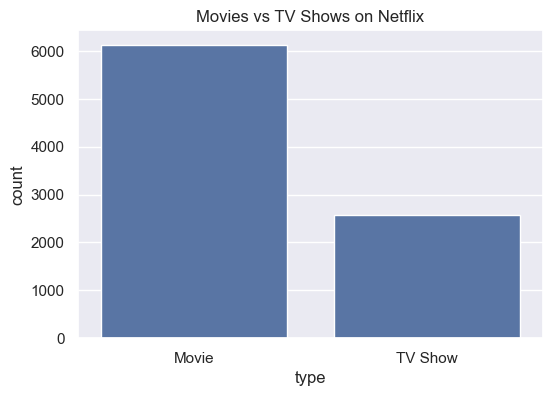

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title("Movies vs TV Shows on Netflix")
plt.show()

## Content Growth Over the Years

Netflix content has increased significantly in recent years.

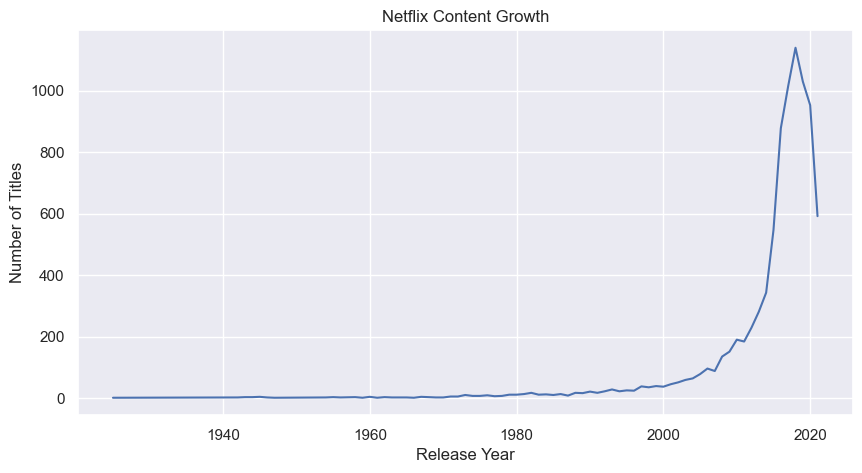

In [10]:
year_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
year_counts.plot(kind='line')
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Netflix Content Growth")
plt.show()

## Top Producing Countries

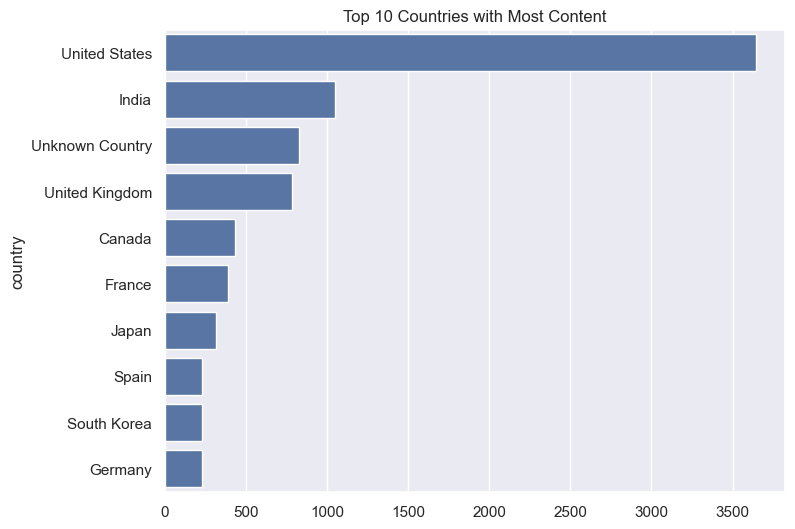

In [11]:
countries = df['country'].str.split(', ').explode()
top_countries = countries.value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries with Most Content")
plt.show()

## Genre Distribution

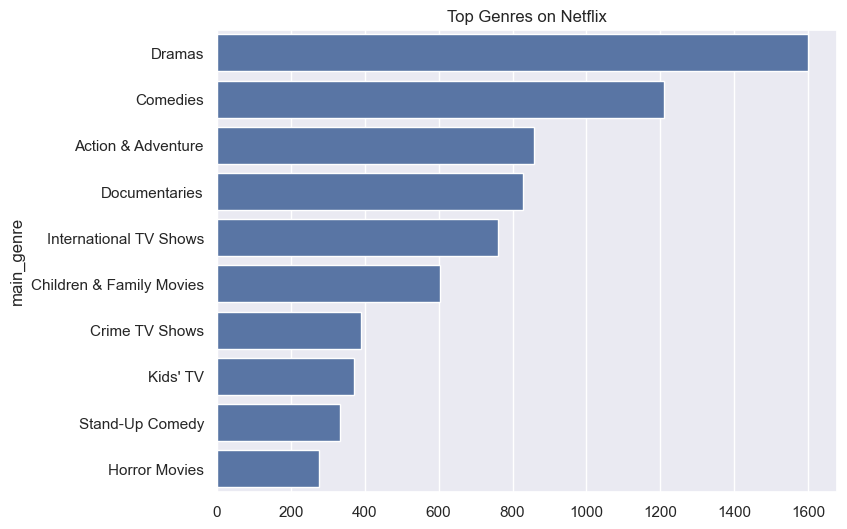

In [12]:
df['main_genre'] = df['listed_in'].str.split(',').str[0]
top_genres = df['main_genre'].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top Genres on Netflix")
plt.show()

## Rating Distribution

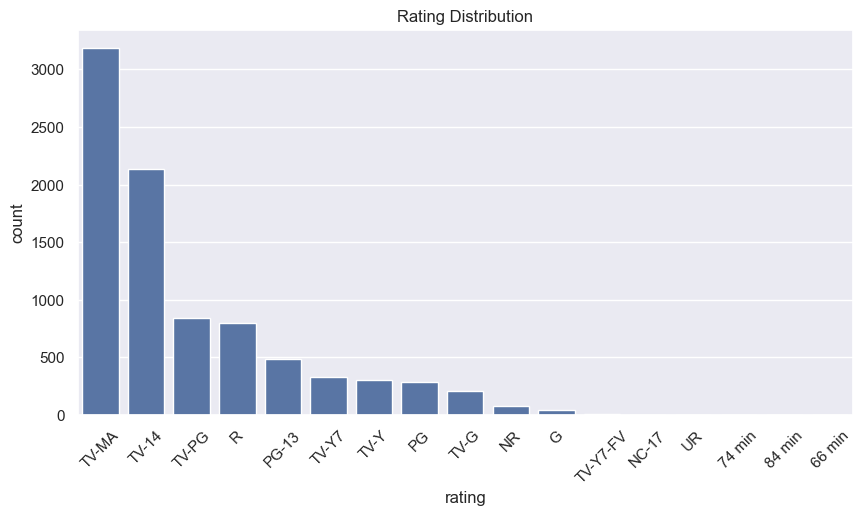

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Rating Distribution")
plt.show()

## Conclusion

Netflix focuses mainly on movies, dominant genres, and a few major countries.
The platform has shown rapid growth over recent years.